# IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name = 1)

# [I] EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
pd.options.display.float_format = '{:.2f}'.format
df.drop(columns=["InvoiceDate", "Customer ID"]).describe()

,Quantity,Price
count,541910.00,541910.00
mean,9.55,4.61
std,218.08,96.76
min,-80995.00,-11062.06
25%,1.00,1.25
50%,3.00,2.08
75%,10.00,4.13
max,80995.00,38970.00


In [10]:
df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


In [14]:
df.describe(include = 'O')

,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [21]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [25]:
df[(df["Quantity"]<0) & (df["Customer ID"].isna())].head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.00,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
937,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.00,United Kingdom


In [30]:
df[(df["Quantity"]<0)].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.00,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
937,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.00,United Kingdom


In [32]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False].head(25)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.00,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
937,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.00,United Kingdom


In [35]:
df["Invoice"].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [43]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [44]:
df["StockCode"] = df["StockCode"].astype("str")

In [47]:
df[df["StockCode"].str.match("^\\d{5}$") == False].head(25)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.00,France
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.00,United Kingdom
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.00,United Kingdom
60,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-01 09:02:00,2.55,17850.00,United Kingdom
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 09:02:00,3.39,17850.00,United Kingdom
62,536373,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 09:02:00,3.39,17850.00,United Kingdom


In [51]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-z]+") == False)].head(25)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.00,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.00,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.00,Germany
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.00,EIRE
1815,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.00,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.00,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.00,United Kingdom


In [59]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1815,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom
5686,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom


In [68]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-z]+") == False)]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'],
      dtype=object)

In [67]:
df[df["StockCode"].str.contains("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.00,13952.00,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.00,15618.00,United Kingdom
358670,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.00,16133.00,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.00,16198.00,United Kingdom


In [69]:
filtered_df = df[
    (df["StockCode"].str.match(r"^\d{5}$") == False) &
    (df["StockCode"].str.match(r"^\d{5}[a-zA-Z]+") == False)
]

stockcode_counts = filtered_df["StockCode"].value_counts()
print(stockcode_counts)

StockCode
POST            1257
DOT              710
M                571
C2               144
D                 77
S                 63
BANK CHARGES      37
AMAZONFEE         34
CRUK              16
DCGSSGIRL         13
DCGSSBOY          11
gift_0001_20      10
gift_0001_10       9
gift_0001_30       8
DCGS0003           5
gift_0001_50       4
PADS               4
gift_0001_40       3
B                  3
DCGS0069           2
DCGS0070           2
DCGS0076           2
DCGS0072           1
DCGS0074           1
DCGS0057           1
m                  1
DCGS0004           1
DCGS0073           1
DCGS0071           1
DCGS0066P          1
DCGS0068           1
DCGS0067           1
DCGS0055           1
Name: count, dtype: int64


# [II] DATA CLEANING

In [151]:
cleaned_df = df.copy()

In [152]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

In [153]:
mask = cleaned_df["Invoice"].str.match("^\\d{6}") == True

In [154]:
len(cleaned_df)/len(df)

1.0

In [155]:
cleaned_df = cleaned_df[mask]

In [156]:
len(cleaned_df)/len(df)

0.9828550866380026

#### NOTE: around 1.8 - 2.0 % of data cleaned after cleaning the invoice column

In [159]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

In [160]:
mask = ((cleaned_df["StockCode"].str.match("^\\d{5}$") == True) | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) | (cleaned_df["StockCode"].str.match("PADS$") == True))

In [161]:
cleaned_df = cleaned_df[mask]

In [162]:
len(cleaned_df)

530214

In [163]:
len(cleaned_df)/len(df)

0.9784170803269916

#### NOTE: around 2.1 % of data cleaned after cleaning the StockCode column

In [169]:
cleaned_df.dropna(subset = ["Customer ID"], inplace = True)

In [170]:
len(cleaned_df)

396374

In [171]:
len(cleaned_df)/len(df)

0.7314387998007049

#### NOTE: *SIGNIFICANT* around 27 % of data cleaned after cleaning the null values from the Customer ID column

In [177]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.00]

In [183]:
len(cleaned_df)

396340

In [184]:
len(cleaned_df)/len(df)

0.7313760587551439

#### NOTE: After the overall cleaning process, we lose around 27% of the data from the df

In [187]:
df.drop(columns = ["InvoiceDate"]).describe()

,Quantity,Price,Customer ID
count,541910.00,541910.00,406830.00
mean,9.55,4.61,15287.68
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [188]:
cleaned_df.drop(columns = ["InvoiceDate"]).describe()

,Quantity,Price,Customer ID
count,396340.00,396340.00,396340.00
mean,13.01,2.87,15301.69
std,179.64,4.26,1709.96
min,1.00,0.00,12346.00
25%,2.00,1.25,13975.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16803.00
max,80995.00,649.50,18287.00


#### We can compare the stats of quantity and price; the min is not negative anymore

# [III] FEATURE ENGINEERING

## Aggregating Columns

In [189]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396340 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      396340 non-null  object        
 1   StockCode    396340 non-null  object        
 2   Description  396340 non-null  object        
 3   Quantity     396340 non-null  int64         
 4   InvoiceDate  396340 non-null  datetime64[ns]
 5   Price        396340 non-null  float64       
 6   Customer ID  396340 non-null  float64       
 7   Country      396340 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.2+ MB


In [190]:
cleaned_df["TraxnAmt"] = cleaned_df["Price"] * cleaned_df["Quantity"]

In [192]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TraxnAmt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [194]:
aggregated_df = cleaned_df.groupby(by = ["Customer ID"], as_index = False).agg(
    MonetaryValue = ("TraxnAmt", "sum"),
    Frequency = ("Invoice", "nunique"),
    LastInvoiceDate = ("InvoiceDate", "max"))

In [195]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer ID      4334 non-null   float64       
 1   MonetaryValue    4334 non-null   float64       
 2   Frequency        4334 non-null   int64         
 3   LastInvoiceDate  4334 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 135.6 KB


In [198]:
aggregated_df.head(20)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77183.60,1,2011-01-18 10:01:00
1,12347.00,4310.00,7,2011-12-07 15:52:00
2,12348.00,1437.24,4,2011-09-25 13:13:00
3,12349.00,1457.55,1,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00
5,12352.00,1385.74,7,2011-11-03 14:37:00
6,12353.00,89.00,1,2011-05-19 17:47:00
7,12354.00,1079.40,1,2011-04-21 13:11:00
8,12355.00,459.40,1,2011-05-09 13:49:00
9,12356.00,2487.43,3,2011-11-17 08:40:00


In [201]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
print(max_invoice_date)

2011-12-09 12:50:00


In [202]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

In [203]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer ID      4334 non-null   float64       
 1   MonetaryValue    4334 non-null   float64       
 2   Frequency        4334 non-null   int64         
 3   LastInvoiceDate  4334 non-null   datetime64[ns]
 4   Recency          4334 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 169.4 KB


In [204]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77183.60,1,2011-01-18 10:01:00,325
1,12347.00,4310.00,7,2011-12-07 15:52:00,1
2,12348.00,1437.24,4,2011-09-25 13:13:00,74
3,12349.00,1457.55,1,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


### Finding Outliers

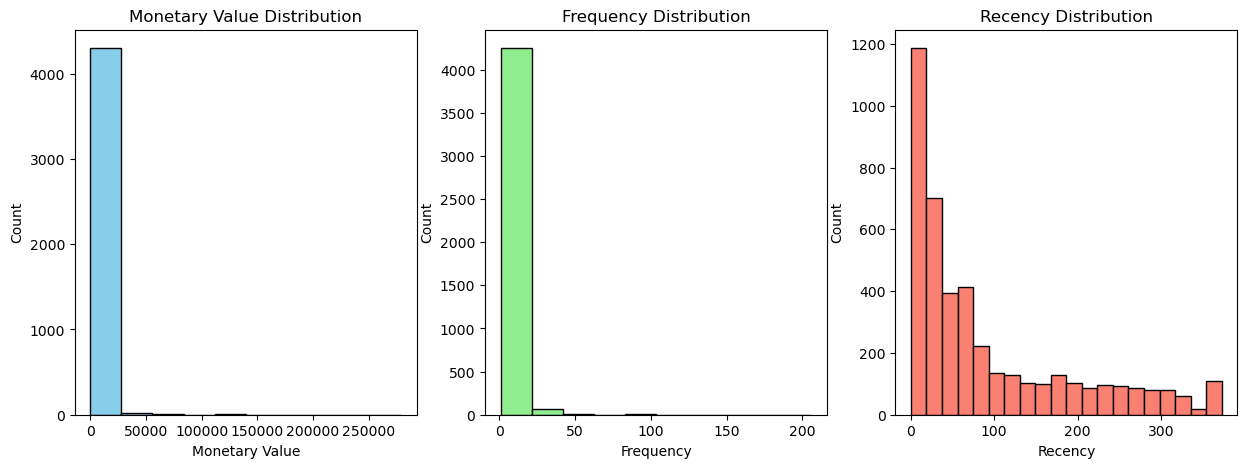

In [216]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.show()


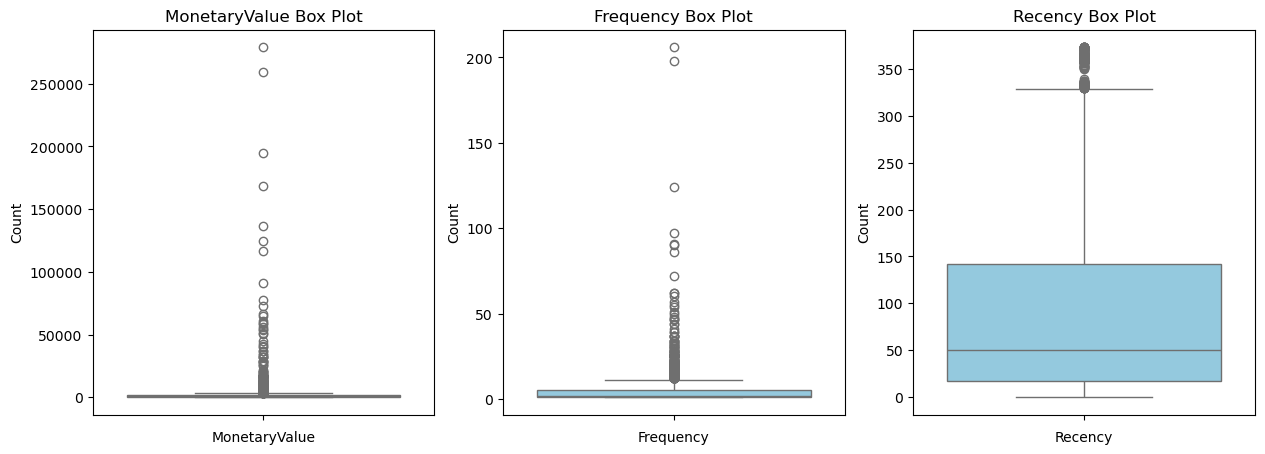

In [220]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df['MonetaryValue'], color = 'skyblue')
plt.title("MonetaryValue Box Plot")
plt.xlabel("MonetaryValue")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(aggregated_df['Frequency'], color = 'skyblue')
plt.title("Frequency Box Plot")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(aggregated_df['Recency'], color = 'skyblue')
plt.title("Recency Box Plot")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.show()

#### Observation: Too many outliers in the Monetary and Frequency columns, we need to reduce them using IQR method

### Handling Outliers

In [234]:
# Monetary value based outlier handling

M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
IQR = M_Q3 - M_Q1

m_outlier_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + IQR*1.5)) | (aggregated_df["MonetaryValue"] < (M_Q1 - IQR*1.5))]
m_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,425.00,425.00,425.00,425,425.00
mean,15033.64,12568.00,16.65,2011-11-14 08:29:09.741176576,24.72
min,12346.00,3622.68,1.00,2010-12-02 15:27:00,0.00
25%,13324.00,4359.32,8.00,2011-11-15 14:22:00,3.00
50%,15005.00,5891.61,12.00,2011-11-29 12:09:00,10.00
75%,16655.00,9430.52,19.00,2011-12-06 12:09:00,23.00
max,18251.00,279138.02,206.00,2011-12-09 12:49:00,371.00
std,1797.85,26097.90,19.07,NaN,47.08


In [235]:
# Frequency based outlier handling

F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
IQR = F_Q3 - F_Q1

f_outlier_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + IQR*1.5)) | (aggregated_df["Frequency"] < (F_Q1 - IQR*1.5))]
f_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,278.00,278.00,278.00,278,278.00
mean,15355.67,14488.01,23.09,2011-11-25 21:49:19.640287744,13.17
min,12395.00,1296.44,12.00,2010-12-02 15:27:00,0.00
25%,13880.25,4197.77,13.00,2011-11-23 20:17:15,2.00
50%,15290.50,6283.52,17.00,2011-12-03 13:42:00,5.50
75%,16781.25,11040.84,25.00,2011-12-07 12:15:30,15.00
max,18283.00,279138.02,206.00,2011-12-09 12:49:00,371.00
std,1745.00,30142.78,21.17,NaN,30.37


In [237]:
non_outlier_df = aggregated_df[(~aggregated_df.index.isin(m_outlier_df.index)) & (~aggregated_df.index.isin(f_outlier_df.index))]

non_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3863.00,3863.00,3863.00,3863,3863.00
mean,15323.85,853.81,2.76,2011-08-31 01:42:04.721718784,99.94
min,12348.00,3.75,1.00,2010-12-01 09:53:00,0.00
25%,13850.50,278.50,1.00,2011-07-01 15:21:00,21.00
50%,15333.00,570.46,2.00,2011-10-11 14:24:00,58.00
75%,16798.00,1187.01,4.00,2011-11-17 13:39:00,160.00
max,18287.00,3619.17,11.00,2011-12-09 12:50:00,373.00
std,1709.73,794.61,2.17,NaN,101.87


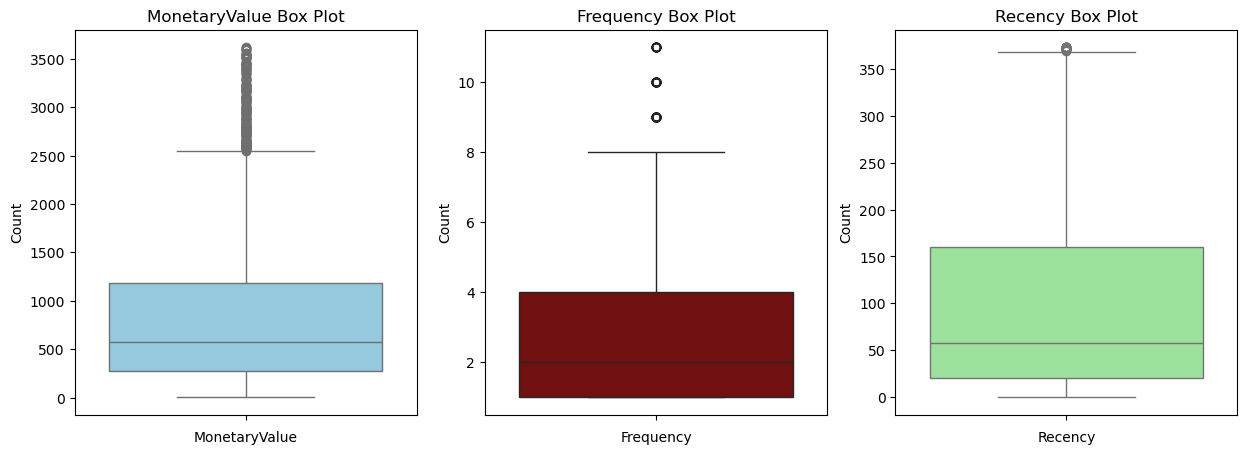

In [239]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outlier_df['MonetaryValue'], color = 'skyblue')
plt.title("MonetaryValue Box Plot")
plt.xlabel("MonetaryValue")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(non_outlier_df['Frequency'], color = 'maroon')
plt.title("Frequency Box Plot")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(non_outlier_df['Recency'], color = 'lightgreen')
plt.title("Recency Box Plot")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.show()

#### Observation: The number of outliers in MonetaryValue & Frequency have reduced significantly, yet few still exist. These are untangible in terms of business needs and analysis

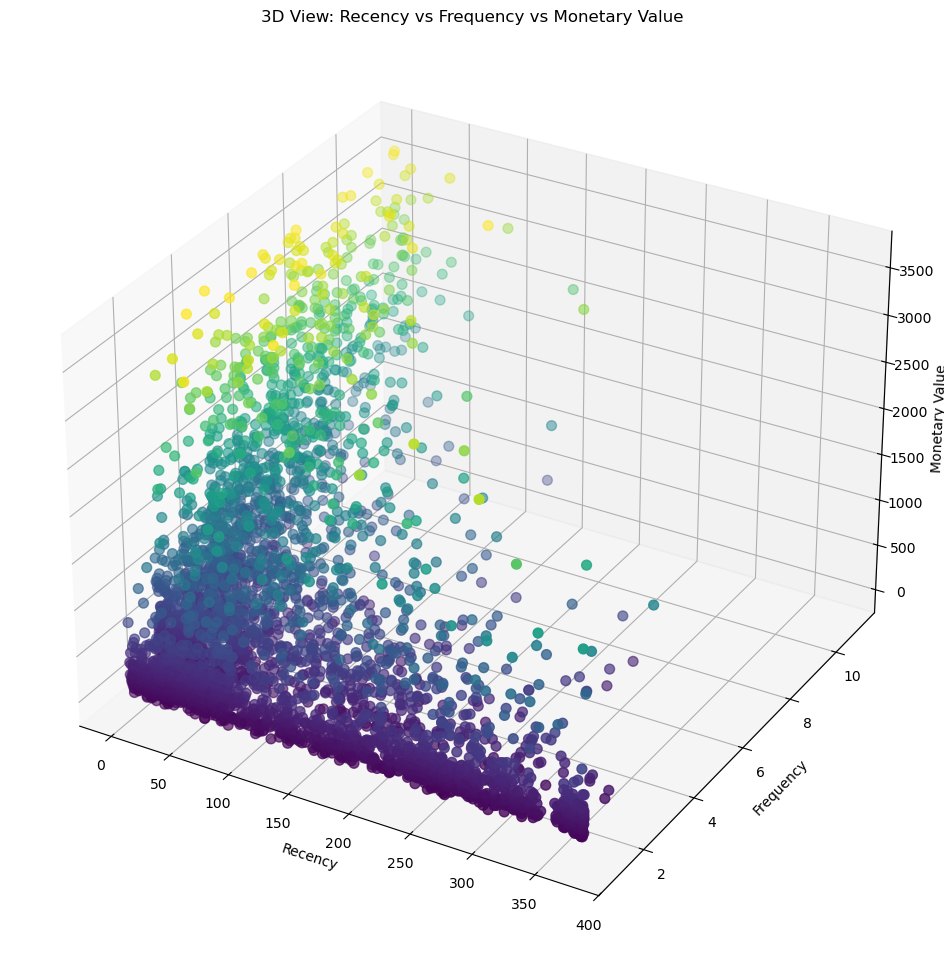

In [244]:
from mpl_toolkits.mplot3d import Axes3D

# Sample columns from your DataFrame
x = non_outlier_df['Recency']
y = non_outlier_df['Frequency']
z = non_outlier_df['MonetaryValue']

# Create figure and 3D axis
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Plotting
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Axis labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

plt.title('3D View: Recency vs Frequency vs Monetary Value')
plt.show()


#### Observation: The range of values for each of the parameters largely vary, ie, they exist on different scales, thus limiting our analysis, hence need for Scaling

In [251]:
scaler = StandardScaler()
scaled = scaler.fit_transform(non_outlier_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data_df = pd.DataFrame(scaled, index = non_outlier_df.index, columns = [["MonetaryValue", "Frequency", "Recency"]])
scaled_data_df.describe()

,MonetaryValue,Frequency,Recency
count,3863.00,3863.00,3863.00
mean,0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-1.07,-0.81,-0.98
25%,-0.72,-0.81,-0.78
50%,-0.36,-0.35,-0.41
75%,0.42,0.57,0.59
max,3.48,3.80,2.68


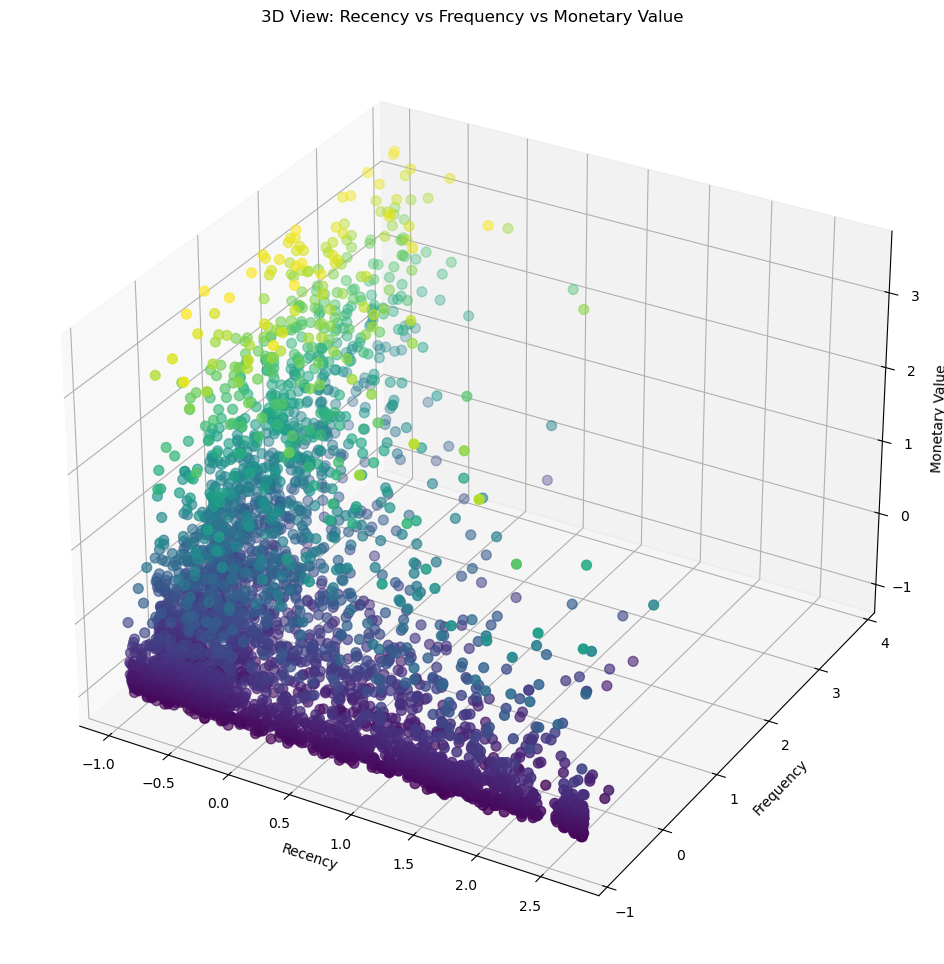

In [252]:
from mpl_toolkits.mplot3d import Axes3D

# Sample columns from your DataFrame
x = scaled_data_df['Recency']
y = scaled_data_df['Frequency']
z = scaled_data_df['MonetaryValue']

# Create figure and 3D axis
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Plotting
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Axis labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

plt.title('3D View: Recency vs Frequency vs Monetary Value')
plt.show()


# [IV] KMEANS CLUSTERING

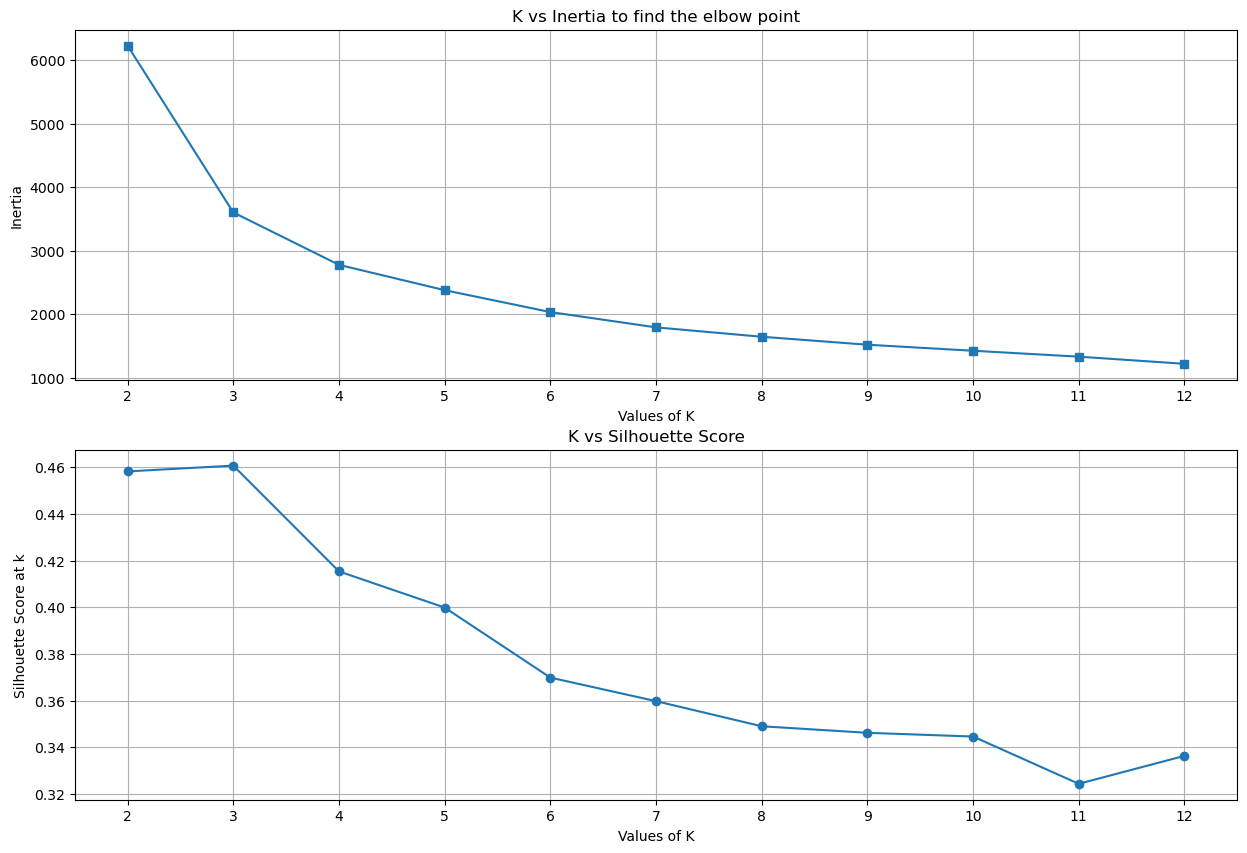

In [267]:
#upper limit for k
max_k = 12
inertia = []
silhouette_scores = []

k_range = range(2, max_k + 1)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)
    cluster_no = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_no) # tie breaker if two or more points in contention
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(sil_score)
    

plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
plt.plot(k_range, inertia, marker = "s")
plt.title("K vs Inertia to find the elbow point")
plt.xlabel("Values of K")
plt.ylabel("Inertia")
plt.xticks(k_range) #include all the values in the range 
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(k_range, silhouette_scores, marker = "o")
plt.title("K vs Silhouette Score")
plt.xlabel("Values of K")
plt.ylabel("Silhouette Score at k")
plt.xticks(k_range) #include all the values in the range 
plt.grid(True)


plt.show()


#### Observation: 4 & 5 can be the elbow points, and since sil_score at 4 > sil_score at 5, we choose 4.
#### Hence number of clusters = 4.

In [275]:
# running k means on our dataset scaled_df

kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)
cluster_no = kmeans.fit_predict(scaled_data_df) + 1

non_outlier_df.loc[:, "Cluster No"] = cluster_no
non_outlier_df.head(25)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster No
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,4
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,1
4,12350.00,294.40,1,2011-02-02 16:01:00,309,2
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,3
6,12353.00,89.00,1,2011-05-19 17:47:00,203,2
7,12354.00,1079.40,1,2011-04-21 13:11:00,231,2
8,12355.00,459.40,1,2011-05-09 13:49:00,213,2
9,12356.00,2487.43,3,2011-11-17 08:40:00,22,4
11,12358.00,928.06,2,2011-12-08 10:26:00,1,1
13,12360.00,2302.06,3,2011-10-18 15:22:00,51,4


# [V] Visualisation

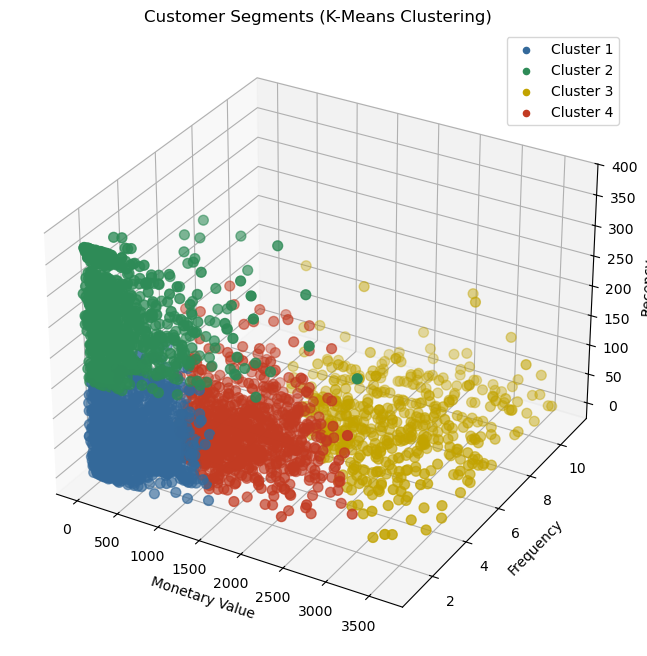

In [288]:
from mpl_toolkits.mplot3d import Axes3D

# Define cluster colors
cluster_colors = {
    1: '#34699A',  # Darker blue
    2: '#2E8B57',  # Darker green
    3: '#C2A300',  # Darker yellow
    4: '#C23B22'   # Darker red/pink
}

# Map colors to the data
color = non_outlier_df["Cluster No"].map(cluster_colors)

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using mapped color
scatter = ax.scatter(
    non_outlier_df['MonetaryValue'],
    non_outlier_df['Frequency'],
    non_outlier_df['Recency'],
    c=color,
    s=50
)

# Axis labels
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.title('Customer Segments (K-Means Clustering)')

# Custom legend
for cluster, col in cluster_colors.items():
    ax.scatter([], [], [], c=col, label=f'Cluster {cluster}')
ax.legend()

plt.show()

### Create a violin plot for detailed view for each parameter

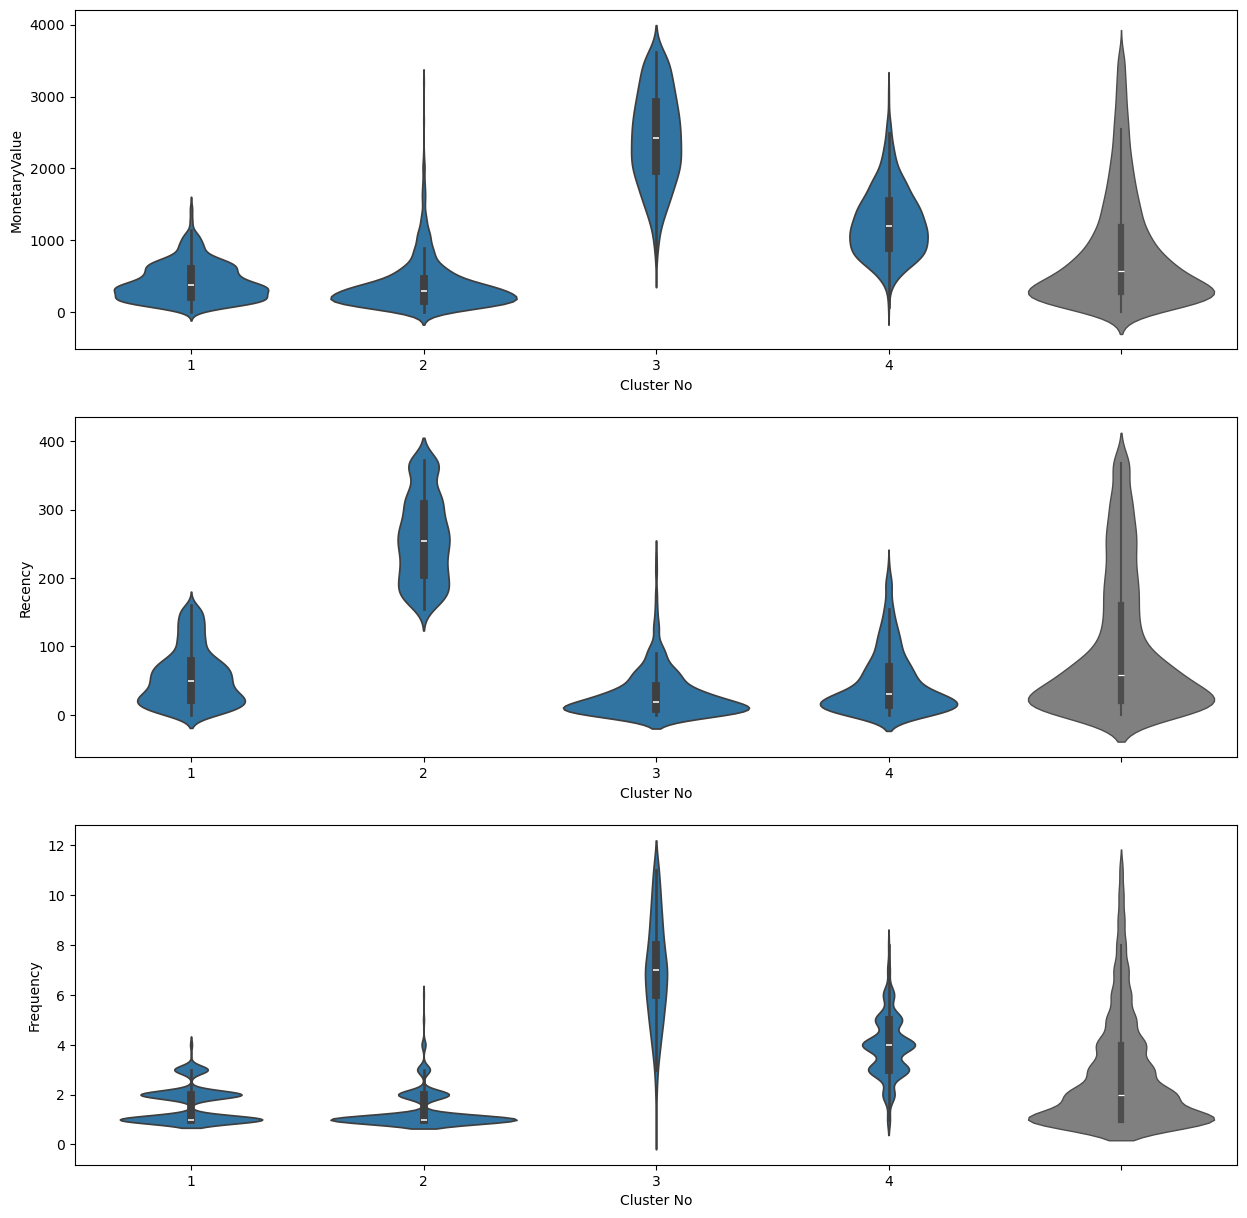

In [299]:
plt.figure(figsize = (15,15))

plt.subplot(3,1,1)
sns.violinplot(x = non_outlier_df['Cluster No'], y = non_outlier_df['MonetaryValue'])
sns.violinplot(y=non_outlier_df['MonetaryValue'], color='gray', linewidth=1.0)

plt.subplot(3,1,2)
sns.violinplot(x = non_outlier_df['Cluster No'], y = non_outlier_df['Recency'])
sns.violinplot(y=non_outlier_df['Recency'], color='gray', linewidth=1.0)

plt.subplot(3,1,3)
sns.violinplot(x = non_outlier_df['Cluster No'], y = non_outlier_df['Frequency'])
sns.violinplot(y=non_outlier_df['Frequency'], color='gray', linewidth=1.0)

plt.show()

# Customer Segmentation Strategies

## A] New/One-Time Buyers

**Characteristics:**
- Low Monetary Value  
- Low Recency (recent purchases)  
- Low to moderate Frequency  

**Interpretation:**  
- New Customers or One-time Buyers  
- These customers have made recent purchases, but their overall value and frequency are low.  
- Could be first-time buyers or customers who haven’t developed loyalty yet.

**Strategy:**
- **Nurture & Educate**  
  Offer onboarding, product education, and incentives to increase frequency.

---

## B] At-Risk or Lost Customers

**Characteristics:**
- Low Monetary Value  
- High Recency (haven’t purchased recently)  
- Low Frequency  

**Interpretation:**  
- At-Risk or Lost Customers  
- These users have not engaged in a while and never contributed significantly.

**Strategy:**
- **Win-back Campaigns**  
  Offer reactivation discounts, personalized outreach, or feedback forms to understand churn.

---

## C] High-Value & Loyal Customers

**Characteristics:**
- High Monetary Value  
- Low Recency (very recent engagement)  
- High Frequency  

**Interpretation:**  
- Best customer segment: they buy frequently, recently, and spend the most.

**Strategy:**
- **Reward & Retain**  
  Loyalty programs, exclusive offers, early access to products, and appreciation communication.

---

## D] Potential Loyalists

**Characteristics:**
- Moderate Monetary Value  
- Moderate Recency  
- Moderate to High Frequency  

**Interpretation:**  
- Customers who are fairly active and spend decently, but not at the level of High-Value customers.

**Strategy:**
- **Upsell & Engage**  
  Identify what makes High-Value customers different and try to elevate this segment with tailored campaigns and incentives.


## OUTLIER ANALYSIS
### Remember, we left out the outliers? We'll segment these outliers now

In [315]:
outliers_overlapped = m_outlier_df.index.intersection(f_outlier_df.index)

only_m_df = m_outlier_df.drop(outliers_overlapped)
only_f_df = f_outlier_df.drop(outliers_overlapped)
both_mf_df = m_outlier_df.loc[outliers_overlapped]

only_m_df["Cluster No"] = -1
only_f_df["Cluster No"] = -2
both_mf_df["Cluster No"] = -3

outliers_df = pd.concat([only_m_df, only_f_df, both_mf_df])

outliers_df.shape


(471, 6)

### Now let's visualize the outlier clusters

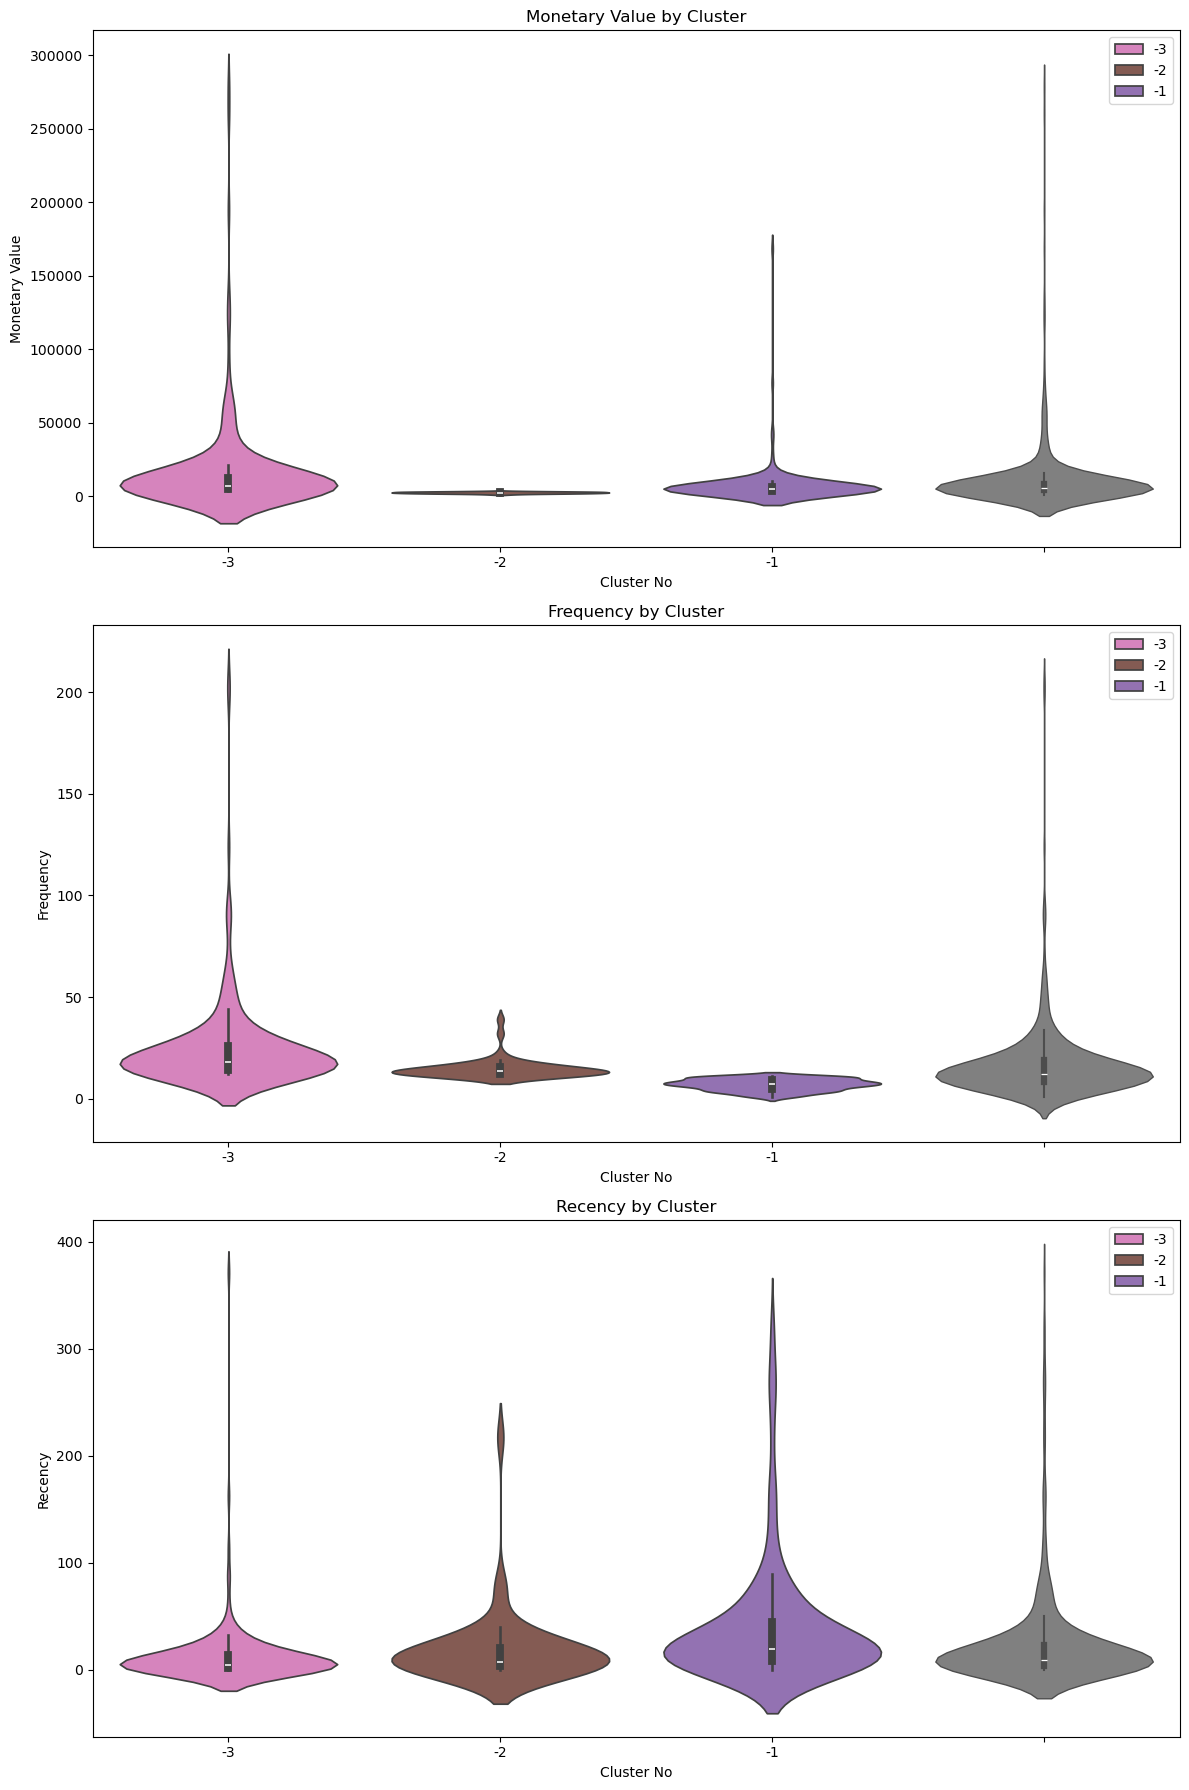

In [318]:
cluster_colors ={-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

# Map colors to the data
plt.figure(figsize = (12,18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outliers_df['Cluster No'], y=outliers_df['MonetaryValue'], palette=cluster_colors, hue=outliers_df["Cluster No"])
sns.violinplot(y=outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outliers_df['Cluster No'], y=outliers_df['Frequency'], palette=cluster_colors, hue=outliers_df["Cluster No"])
sns.violinplot(y=outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outliers_df['Cluster No'], y=outliers_df['Recency'], palette=cluster_colors, hue=outliers_df["Cluster No"])
sns.violinplot(y=outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


## OBSERVATION OF OUTLIER CLUSTER ANALYSIS:

### Cluster -3 (Pink): **New & Recent Buyers**
- **Characteristics**: Low Monetary, Low Frequency, Low Recency (recent).
- **Reasoning**:  
  "New" captures their recent arrival and typical low initial Frequency and Monetary values.  
  "Recent Buyers" is also an appropriate label.  
  This aligns with the **"A] New/One-Time Buyers"** template.

---

### Cluster -2 (Brown): **At-Risk Low Spenders**
- **Characteristics**: Very Low Monetary, Very Low Frequency, Moderate Recency.
- **Reasoning**:  
  These customers haven't purchased in a while ("At-Risk") and were never significant contributors ("Low Spenders").  
  They are less "lost" than Cluster -1 but are clearly fading in engagement.

---

### Cluster -1 (Purple): **Dormant & Lapsed Customers**
- **Characteristics**: Low Monetary, Low Frequency, High Recency.
- **Reasoning**:  
  "Dormant" or "Lapsed" clearly indicates a long period of inactivity.  
  Their historical low Monetary and Frequency values suggest they weren’t high-value customers to begin with.  
  This aligns well with the **"B] At-Risk or Lost Customers"** template.